# EDA - Single Variable Analysis (Univariate Analysis)

In this notebook we'll explore the techniques most commonly used to investigate features one by one in a dataset.

### Import Basic Packages & Data 

We will import the student grades dataset once again to explore various univariate analysis techniques.

In [1]:
#Basics
import numpy as np
import pandas as pd

In [2]:
# Import data to a pandas dataframe
df_grades = pd.read_csv('student_grades_eda.csv')
df_grades.head()

# We will be working with the student grades EDA dataset. The target variable in this instance is the grade average of the student.

student_ID first_name last_name      faculty  tuition  OH_participated  \
0    20123456       John      Park         Arts    44191                0   
1    20123457       Alex     Great      Science    32245                4   
2    20123458  Sebastian    Taylor     Business    42679                6   
3    20123459    Michael       Bay         Math    46478               15   
4    20123460      Scott    Foster  Engineering    36784                5   

   classes_skipped grade_avg  
0                5         B  
1               10         B  
2                7         B  
3                2         A  
4                8         A

### Descriptive Stats for Numeric Features

In the previous chapter, we discussed about the `describe` function to show a summary of stats for a numeric column. We initially used this function to clean our data, but this is also a very effective way to look at the distribution of our numeric column.

In [3]:
# Summary of statistics
df_grades['classes_skipped'].describe()

count    30.000000
mean      4.733333
std       3.027840
min       0.000000
25%       2.250000
50%       4.000000
75%       7.000000
max      10.000000
Name: classes_skipped, dtype: float64

What if we want to single out a specific statistical measure? We can use functions such as the `mean` function and others to get the specific statistical measure for each numerical feature.

In [4]:
# Manually return a statistic of interest 
print(df_grades['tuition'].mean())
print(df_grades['tuition'].quantile(0.25))
print(df_grades['tuition'].std())
print(df_grades['tuition'].var())

40307.066666666666
34824.75
5792.681196447648
33555155.44367816


### Basic packages for data visualization

In [5]:
# basic packages for visualization. 
import seaborn as sns
import matplotlib.pyplot as plt

### Basic Plots for Numeric Features

The simpliest yet most effective way to display findings and analysis is with the use of visuals. The two most common packages for visualizations are the `seaborn` and `matplotlib` packages. For the lesson, we will use the `seaborn` package to create our plots.

We will first go over a histogram, which displays the distribution of a numeric column. Histograms allow us to see the shape of the data to easily see insights such as where the data is most concentrated, how spread out the data is, and how skewed the data is. 

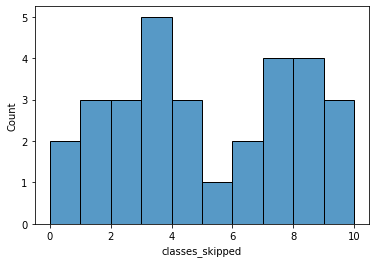

In [6]:
# Show a basic histplot of the ClassesSkipped column 
histplot = sns.histplot(data = df_grades, x ='classes_skipped', binwidth = 1)

One other simple yet effective way to show a distribution and to identify outliers is through a box plot. Box plots allow us to see the quartiles of a distribution and allows us to easily see outliers. We normally consider anything outside of the whisker based on the IQR rule.

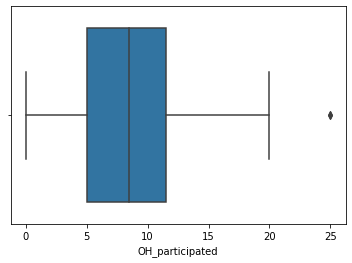

In [7]:
# Plot a box plot for the office hours participated column. 
boxplot = sns.boxplot(data = df_grades, x = 'OH_participated')

One key note when looking for outliers based on the whiskers of the box plot is that the whiskers always assumes outliers based on the IQR rule. 

We can also combine the two above visuals into one by combining their axis together. For example, we will combine the x axis of both charts to neatly visualize the distributions.

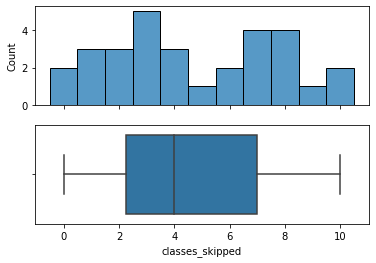

In [8]:
# Plot a histogram and blox plot together and make them share the same axis
fig, (hist, box) = plt.subplots(2, 1,sharex=True)
histplot = sns.histplot(data = df_grades, x ='classes_skipped', discrete = True, ax = hist)
boxplot = sns.boxplot(data = df_grades, x = 'classes_skipped', orient='h', ax = box)

Not only can we create visuals just by referencing the data in our dataframe, but we can create visuals by combining functions together and plot the result. For example, we can calculate the distribution of z-scores by combining the `mean` and `std` functions together.

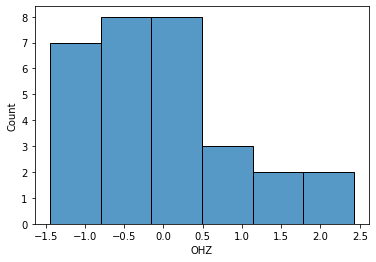

In [9]:
#Plot the Z scores of the values in a column
mean = df_grades['OH_participated'].mean()
std = df_grades['OH_participated'].std()
df_grades['OHZ'] = (df_grades['OH_participated'] - mean )/ std
histplot = sns.histplot(data = df_grades, x ='OHZ')

### Basic Plots for Categorical Features

So far, we have looked at EDA for numerical columns. But what about categorical columns? We will now look at various ways we can conduct EDA for these features.

One of the most basic plots for categorical features is the use of the `countplot` function. This allows us to see the count of each unique categorical value in the feature.

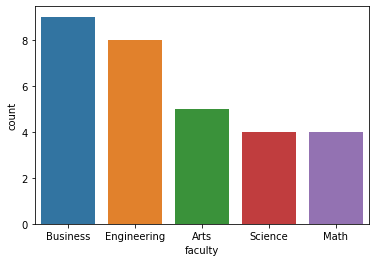

In [10]:
# Plot the count of the categories in the Faculty column and then order them.
# faculty_counts = df_grades['faculty'].value_counts().index
countplot = sns.countplot(data = df_grades, x ='faculty', order = df_grades['faculty'].value_counts().index)

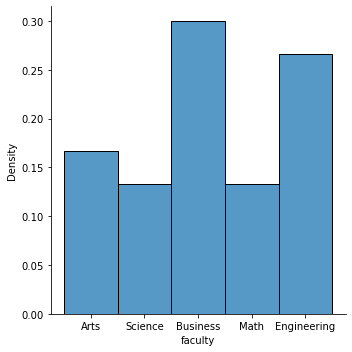

In [11]:
# Plot the percentage of observations in each category and order by frequency
displot = sns.displot(data = df_grades, x ='faculty', stat="density" )

Another way of displaying categorical values is with the use of pie charts. 

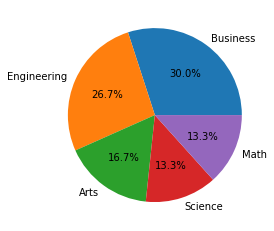

In [12]:
# Plotting via pie chart
pie_data = df_grades['faculty'].value_counts()
plt.pie(pie_data.values, labels = pie_data.index, autopct="%.1f%%")
plt.show()

However, we do not recommend pie charts with large amount of unique values since it can look quite messy, but it can be an option that can cater to a particular audience.

### Exercise 1 (Basic) - Visuals for Categorical Features

We will now import our data Indian Car Dataset. This dataset has the information of cars sold as well as their attributes. We will first look at creating visuals for the categorical features in this dataset.

In [26]:
# import data
df_cars = pd.read_csv('indian_cars_dataset.csv')
df_cars

ending_price  starting_price  reviews_count  max_torque_nm  \
0          583000          399000             51           89.0   
1         1396000          799000             86          136.8   
2         1603000         1353000            242          300.0   
3         2458000         1318000            313          450.0   
4         2390000         1199000            107          400.0   
..            ...             ...            ...            ...   
198        999000          659000             35          500.0   
199       1041000         1041000              3          400.0   
200       2075000         1615000              2          350.0   
201      21700000        21700000              9          800.0   
202        397000          391000              4           69.0   

     max_torque_rpm  max_power_bhp  max_power_rp  fuel_tank_capacity  \
0              3500          65.71          5500                27.0   
1              4400         101.65          6000                48.0   
2              2800         130.00          3750                57.0   
3              2800         182.38          3500                60.0   
4              2750         172.45          3500                57.0   
..              ...            ...           ...                 ...   
198            5250         415.71          6750                 0.0   
199            4400         254.79          5000                59.0   
200            2500         167.67          3750                60.0   
201            4500         591.39          6000                85.0   
202            3500          47.33          6000                35.0   

     no_cylinder  rating  seating_capacity fuel_type  engine_displacement  \
0              3     4.5               5.0    Petrol                  998   
1              4     4.5               5.0    Petrol                 1462   
2              4     4.5               4.0    Diesel                 2184   
3              4     4.5               7.0    Diesel                 2198   
4              4     4.5               7.0    Diesel                 2198   
..           ...     ...               ...       ...                  ...   
198            4     4.5               5.0    Petrol                 1991   
199            4     4.5               5.0    Petrol                 1998   
200            4     4.5               7.0    Diesel                 1956   
201            8     3.5               5.0    Petrol                 3998   
202            3     4.5               5.0    Petrol                  796   

    transmission_type  body_type                     car_name  
0           Automatic  Hatchback              Maruti Alto K10  
1           Automatic        SUV                Maruti Brezza  
2           Automatic        SUV                Mahindra Thar  
3           Automatic        SUV              Mahindra XUV700  
4           Automatic        SUV           Mahindra Scorpio-N  
..                ...        ...                          ...  
198         Automatic  Hatchback     Mercedes-Benz AMG A 45 S  
199         Automatic      Sedan  BMW 3 Series Gran Limousine  
200            Manual        SUV               MG Hector Plus  
201         Automatic        SUV                   Audi RS Q8  
202            Manual  Hatchback         Maruti Alto 800 tour  

[203 rows x 16 columns]

Create a bar chart to display the transmission type of SUVs

Task:
- Find the count of each transmission type for SUVs
- Create a bar chart displaying the above

In [27]:
# Filter for SUVs
df_cars[df_cars['body_type'] == 'SUV']

ending_price  starting_price  reviews_count  max_torque_nm  \
1         1396000          799000             86          136.8   
2         1603000         1353000            242          300.0   
3         2458000         1318000            313          450.0   
4         2390000         1199000            107          400.0   
5         4957000         3240000             99          500.0   
..            ...             ...            ...            ...   
194        397000          391000              6          850.0   
196       5690000         5450000              1          350.0   
197       2075000         1615000             78          350.0   
200       2075000         1615000              2          350.0   
201      21700000        21700000              9          800.0   

     max_torque_rpm  max_power_bhp  max_power_rp  fuel_tank_capacity  \
1              4400         101.65          6000                48.0   
2              2800         130.00          3750                57.0   
3              2800         182.38          3500                60.0   
4              2750         172.45          3500                57.0   
5              2800         201.15          3400                80.0   
..              ...            ...           ...                 ...   
194            4500         631.62          6000                 0.0   
196            2500         170.00          3750                60.0   
197            2500         167.67          3750                60.0   
200            2500         167.67          3750                60.0   
201            4500         591.39          6000                85.0   

     no_cylinder  rating  seating_capacity fuel_type  engine_displacement  \
1              4     4.5               5.0    Petrol                 1462   
2              4     4.5               4.0    Diesel                 2184   
3              4     4.5               7.0    Diesel                 2198   
4              4     4.5               7.0    Diesel                 2198   
5              4     4.5               7.0    Diesel                 2755   
..           ...     ...               ...       ...                  ...   
194            8     3.5               4.0    Petrol                 3996   
196            4     4.5               5.0    Diesel                 1998   
197            4     4.5               7.0    Diesel                 1956   
200            4     4.5               7.0    Diesel                 1956   
201            8     3.5               5.0    Petrol                 3998   

    transmission_type body_type               car_name  
1           Automatic       SUV          Maruti Brezza  
2           Automatic       SUV          Mahindra Thar  
3           Automatic       SUV        Mahindra XUV700  
4           Automatic       SUV     Mahindra Scorpio-N  
5           Automatic       SUV        Toyota Fortuner  
..                ...       ...                    ...  
194         Automatic       SUV  Porsche Cayenne Coupe  
196         Automatic       SUV      Compass Trailhawk  
197         Automatic       SUV          Jeep Meridian  
200            Manual       SUV         MG Hector Plus  
201         Automatic       SUV             Audi RS Q8  

[85 rows x 16 columns]

In [28]:
# Find the count of each transmission type for SUVs
df_cars[df_cars['body_type'] == 'SUV']['transmission_type'].value_counts()


Automatic    76
Manual        9
Name: transmission_type, dtype: int64

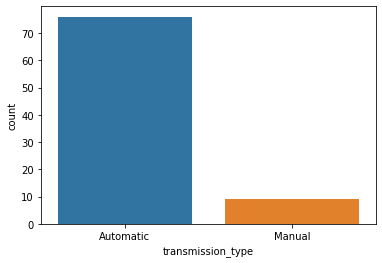

In [29]:
# Plot the count plot
data = df_cars[df_cars['body_type'] == 'SUV']['transmission_type']
countplot = sns.countplot(x = data)


### Exercise 2 (Basic) - Visuals for Numeric Features

Create two visuals that displays the distribution of the starting price of cars based on transmission type. Then find the average starting price for each transmission type

Task:
- Plot the distribution of starting price for each transmission type in a histogram
- Print the average starting price for each transmission type

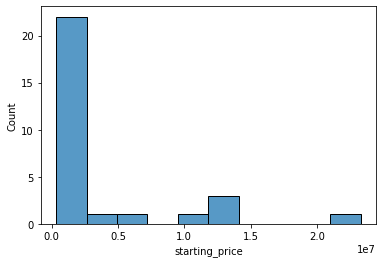

In [30]:
# Plot the distribution for manual transmission
histplot = sns.histplot(data = df_cars[df_cars['transmission_type']=='Manual'], x ='starting_price', bins = 10)

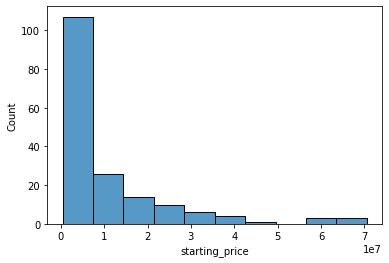

In [31]:
# Plot the distribution for automatic transmission
histplot = sns.histplot(data = df_cars[df_cars['transmission_type']=='Automatic'], x ='starting_price', bins = 10)

In [32]:
# Calculate mean starting price of each transmission type
print('Automatic:', df_cars[df_cars['transmission_type']=='Automatic']['starting_price'].mean())
print('Manual:', df_cars[df_cars['transmission_type']=='Manual']['starting_price'].mean())

Automatic: 10446344.827586208
Manual: 3427413.793103448
